# RandomForest.ipynb
* Using all PCA, HOG and ResNet

## Imports

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_score,recall_score,f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## Load All Features

In [2]:
hog_X = np.load("../data/features/hog_features.npy")
hog_y = np.load("../data/features/hog_labels.npy")

pca_X = np.load("../data/features/pca_features.npy")
pca_y = np.load("../data/features/pca_labels.npy")

resnet_X = np.load("../data/features/resnet_features.npy")
resnet_y = np.load("../data/features/resnet_labels.npy")


## Train/Test Split

In [3]:
def split_data(X, y):
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## RANDOM FOREST (HOG)

🔹 TRAINING METRICS
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
------------------------------------------------------------
🔹 TESTING METRICS
Accuracy: 0.9834905660377359
Precision: 1.0
Recall: 0.9473684210526315
F1-Score: 0.972972972972973
------------------------------------------------------------

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       291
           1       1.00      0.95      0.97       133

    accuracy                           0.98       424
   macro avg       0.99      0.97      0.98       424
weighted avg       0.98      0.98      0.98       424



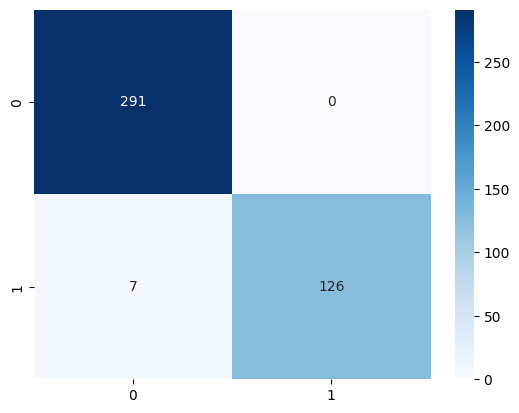

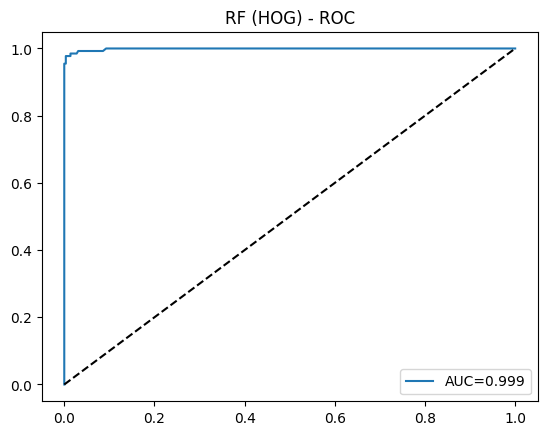

In [8]:
X_train, X_test, y_train, y_test = split_data(hog_X, hog_y)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

print("🔹 TRAINING METRICS")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("-" * 60)

y_pred_test = rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("🔹 TESTING METRICS")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("-" * 60)


print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("RF (HOG) - ROC")
plt.legend()
plt.show()


## RANDOM FOREST (PCA)

🔹 TRAINING METRICS
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
------------------------------------------------------------
🔹 TESTING METRICS
Accuracy: 0.9882075471698113
Precision: 0.9923076923076923
Recall: 0.9699248120300752
F1-Score: 0.9809885931558935
------------------------------------------------------------

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       291
           1       0.99      0.97      0.98       133

    accuracy                           0.99       424
   macro avg       0.99      0.98      0.99       424
weighted avg       0.99      0.99      0.99       424



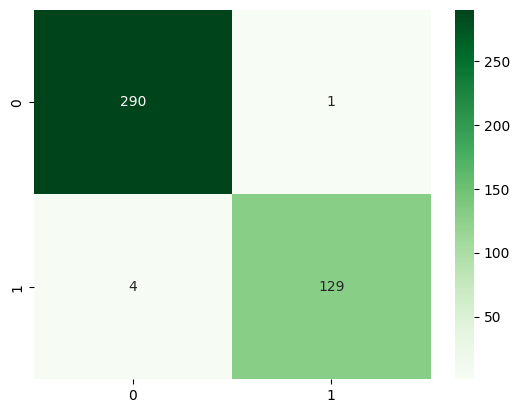

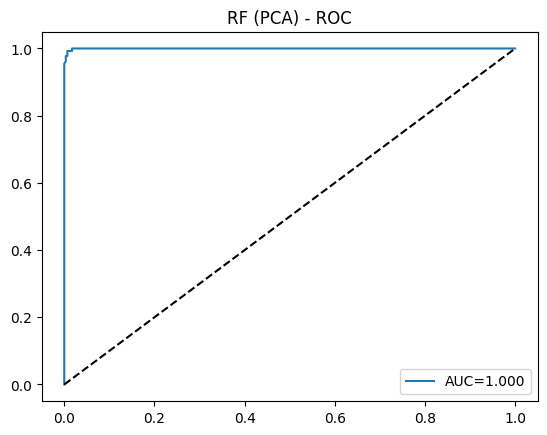

In [11]:
X_train, X_test, y_train, y_test = split_data(pca_X, pca_y)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

print("🔹 TRAINING METRICS")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("-" * 60)

y_pred_test = rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("🔹 TESTING METRICS")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("-" * 60)

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.show()

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("RF (PCA) - ROC")
plt.legend()
plt.show()


## RANDOM FOREST (RESNET DEEP FEATURES)

🔹 TRAINING METRICS
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
------------------------------------------------------------
🔹 TESTING METRICS
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
------------------------------------------------------------

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       133

    accuracy                           1.00       424
   macro avg       1.00      1.00      1.00       424
weighted avg       1.00      1.00      1.00       424



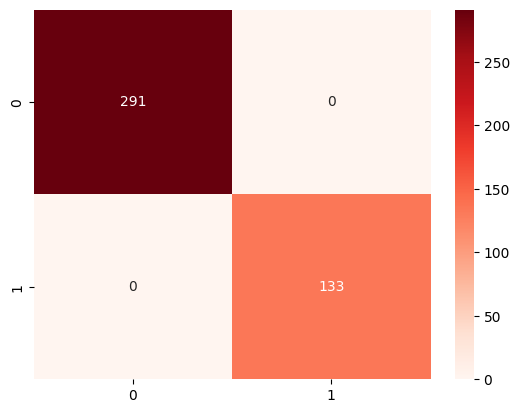

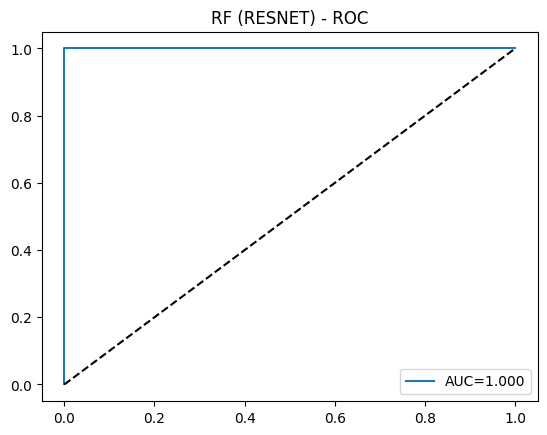

In [12]:
X_train, X_test, y_train, y_test = split_data(resnet_X, resnet_y)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)

print("🔹 TRAINING METRICS")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-Score:", train_f1)
print("-" * 60)

y_pred_test = rf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print("🔹 TESTING METRICS")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-Score:", test_f1)
print("-" * 60)

print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.show()

y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.title("RF (RESNET) - ROC")
plt.legend()
plt.show()